In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
def get_player_id(player_name):
    first_name, last_name = player_name.split(" ")
    last_name = last_name[0:5].lower()
    first_name = first_name[0:2].lower()

    formatted_name = last_name + first_name + '01'
    url = f"https://www.basketball-reference.com/players/d/{formatted_name}.html"
    return url

player_name = "Kevin Durant"
name = get_player_id(player_name)
print(name)

https://www.basketball-reference.com/players/d/duranke01.html


In [3]:
def scrape_player_stats(player_href):
    """
    Scrapes detailed player statistics from their profile page.
    Args:
        player_href (str): URL of the player's profile page.    
    Returns:
        DataFrame: A pandas DataFrame containing the player's statistics.
    """
    response = requests.get(player_href)  # Send a GET request to the player's profile page
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')  # Parse the HTML content
        table = soup.find('table', id='per_game_stats')  # Find the table with per-game statistics
        if table:
            df = pd.read_html(str(table))[0]  # Read the table into a DataFrame
            df = df[df['Season'].notna()]  # Remove rows without season data
            df['Season'] = df['Season'].str.split('-').str[0]  # Keep only the starting year of the season
            df = df[df['Age'].notnull()]  # Include rows where 'Age' is not null - this elimates the season totals
            return df
    return pd.DataFrame()  # Return an empty DataFrame if the page couldn't be loaded or the table wasn't found

In [4]:
from PIL import Image
from io import BytesIO

def player_headshot(player_href):
    response = requests.get(player_href)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser') 

        media_item = soup.find('div', class_='media-item')
        if media_item:
            img_tag = media_item.find('img')
            if img_tag and 'src' in img_tag.attrs:
                img_url = img_tag['src']
                
                img_response = requests.get(img_url)
                if img_response.status_code == 200:
                    image = Image.open(BytesIO(img_response.content))
                    return image 
    return None

player_href = "https://www.basketball-reference.com/players/d/duranke01.html"

# Fetch the headshot image
headshot_image = player_headshot(player_href)

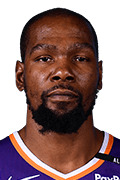

In [39]:
headshot_image